## Decision Tree

In [1]:
from sklearn.datasets import load_iris
iris = load_iris()

In [3]:
iris.data[0:3,:]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2]])

In [4]:
iris.target[0:3]

array([0, 0, 0])

In [5]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(iris.data, iris.target)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [7]:
pred = clf.predict(iris.data)

In [8]:
from sklearn.metrics import accuracy_score
accuracy_score(iris.target, pred)

1.0

In [9]:
from sklearn.tree import export_graphviz
export_graphviz(clf, 'tree.dot')

In [10]:
! cat tree.dot

digraph Tree {
node [shape=box] ;
0 [label="X[3] <= 0.8\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]"] ;
1 [label="gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="X[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]"] ;
0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
3 [label="X[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]"] ;
2 -> 3 ;
4 [label="X[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]"] ;
3 -> 4 ;
5 [label="gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]"] ;
4 -> 5 ;
6 [label="gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]"] ;
4 -> 6 ;
7 [label="X[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]"] ;
3 -> 7 ;
8 [label="gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]"] ;
7 -> 8 ;
9 [label="X[2] <= 5.45\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]"] ;
7 -> 9 ;
10 [label="gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]"] ;
9 -> 10 ;
11 [label="gini = 0.0\nsample

In [12]:
X = iris.data[:, [2, 3]]
y = iris.target
clf = DecisionTreeClassifier(max_depth=2, random_state = 42)
clf.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [13]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
x_min, x_max,y_min, y_max

(0.0, 7.9, -0.9, 3.5)

In [15]:
import numpy as np
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

In [19]:
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

Text(0, 0.5, 'Petal.Width')

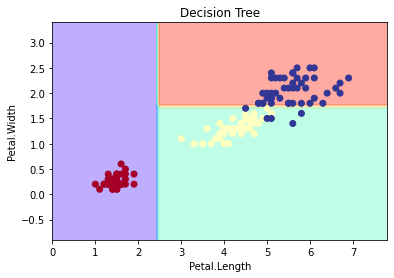

In [20]:
from matplotlib import pyplot as plt
plt.contourf(xx, yy, Z, alpha=0.4, cmap = plt.cm.rainbow)
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=1, cmap = plt.cm.RdYlBu)
plt.title('Decision Tree')
plt.xlabel('Petal.Length')
plt.ylabel('Petal.Width')

In [21]:
from sklearn.linear_model import LogisticRegression
X = iris.data[:, [2, 3]]
y = iris.target
clf = LogisticRegression(random_state = 42)
clf.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Text(0, 0.5, 'Petal.Width')

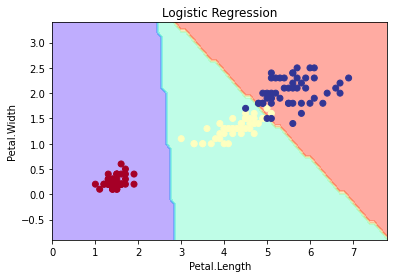

In [22]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
x_min, x_max,y_min, y_max
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4, cmap = plt.cm.rainbow)
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=1, cmap = plt.cm.RdYlBu)
plt.title('Logistic Regression')
plt.xlabel('Petal.Length')
plt.ylabel('Petal.Width')

In [23]:
import numpy as np
X = np.array([20,100, 10, 3])

In [25]:
W1 = np.random.randn(4,5)

In [27]:
O1 = np.dot(X,W1)

In [28]:
W2 = np.random.randn(5,1)
np.dot(O1, W2)

array([-74.55258313])

In [29]:

def sigmoid_function(x):
  return 1 / (1 +np.exp(-x))

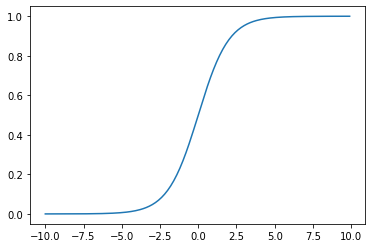

In [30]:
from matplotlib import pyplot as plt
x = np.arange(-10,10,0.1)
y = sigmoid_function(x)
plt.plot(x,y)

In [31]:
import numpy as np
X = np.array([20,100, 10, 3])
W1 = np.random.randn(4,5)
O1 = np.dot(X,W1)
O2 = sigmoid_function(O1)
O2

array([1.00000000e+00, 1.00000000e+00, 6.19191907e-27, 1.38162283e-56,
       1.00000000e+00])

In [32]:
W2 = np.random.randn(5,1)
np.dot(O2, W2)

array([1.06106261])

In [33]:
def gradient_descent(func, init_x, lr = 0.3, epochs = 100):
  x = init_x
  res = [x]
  for i in range(epochs):
    grad = dfunc(func,x)
    x = x - grad * lr
    res.append(x)
  return np.array(res)

In [34]:
def dfunc(f, x):
  h = 1e-4
  return (f(x+h) - f(x)) / (h)

In [35]:
def func(x):
  return x ** 2

dfunc(func, 3)

6.000100000012054

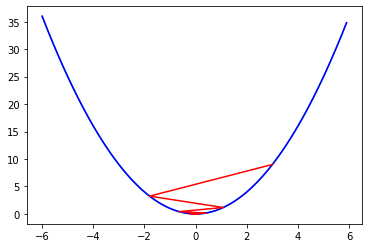

In [36]:
x = np.arange(-6,6,0.1)
y = func(x)
plt.plot(x,y)

p = 3
ary = [p]
for i in range(10):
  p = p - dfunc(func, p) * 0.8
  ary.append(p)

plt.plot(x,y, c='blue')
plt.plot(np.array(ary),func(np.array(ary)), c='red')

In [37]:
from sklearn.datasets import load_digits
digits = load_digits()

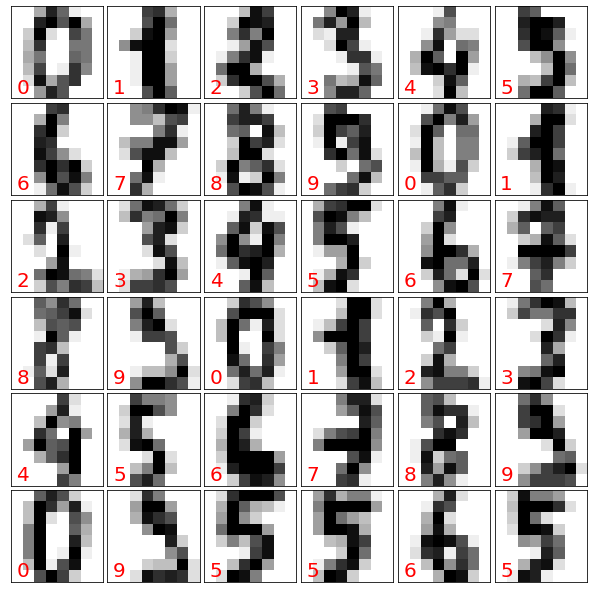

In [38]:
fig = plt.figure(figsize = (8,8))

# 圖與圖的間距
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# 取樣36 張圖
for i in range(36):
    # 每張 6 * 6 的大小
    ax = fig.add_subplot(6, 6, i+1, xticks=[], yticks=[])
    # 繪製灰階圖
    ax.imshow(digits.images[i],cmap=plt.cm.binary,interpolation='nearest')
    # 於左下標示紅色大小為20數字
    ax.text(0, 7, digits.target[i], color="r", fontsize = 20)

In [39]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_scaled = sc.fit_transform(digits.data)

In [42]:
from sklearn.neural_network import MLPClassifier
#epoch: 1000
#solver: stochastic gradient descent
# Input 64 => hidden1 30 => hidden2 30 => hidden3 30 => output 10

mlp = MLPClassifier(hidden_layer_sizes=(30,30,30), 
                    activation='relu', 
                    max_iter = 2000,
                    solver='sgd',
                    learning_rate='constant',
                    learning_rate_init=0.001)

In [43]:
mlp.fit(X_scaled,digits.target)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(30, 30, 30), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=2000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='sgd',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [44]:
predicted = mlp.predict(X_scaled)
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(digits.target, predicted)

0.998330550918197

In [48]:
mlp.coefs_[0]

array([[-0.02313096, -0.22632005, -0.0256175 , ...,  0.22637506,
        -0.17022794,  0.2049266 ],
       [ 0.22866079, -0.17474927, -0.12910087, ..., -0.19676616,
        -0.03197692, -0.07479151],
       [ 0.13019414,  0.15895211, -0.12214436, ..., -0.02818813,
        -0.0381014 , -0.29637856],
       ...,
       [ 0.18831892, -0.12492135, -0.01814829, ..., -0.20748682,
        -0.07003808,  0.12430921],
       [-0.22709786, -0.15379219,  0.07467798, ..., -0.10728843,
         0.27105194,  0.20485723],
       [-0.03807558, -0.18398002,  0.19234922, ...,  0.38038915,
         0.15044183, -0.09674833]])

## Keras

In [49]:
% tensorflow_version 2.x

In [50]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [51]:
x_train.shape

(60000, 28, 28)

In [52]:
x_test.shape

(10000, 28, 28)

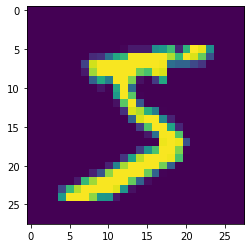

In [53]:
from matplotlib import pyplot as plt
plt.imshow(x_train[0])

In [54]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [55]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

model = Sequential()
model.add(Flatten(input_shape = (28,28)))
model.add(Dense(256, activation = 'relu'))
model.add(Dense(256, activation = 'relu'))
model.add(Dense(10))

In [56]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dense_1 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
Total params: 269,322
Trainable params: 269,322
Non-trainable params: 0
_________________________________________________________________


In [57]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy
loss_fn = SparseCategoricalCrossentropy(from_logits=True)

model.compile(optimizer='sgd',
       loss=loss_fn,
       metrics=['accuracy'])

In [58]:
model.fit(x_train, y_train, epochs=15)

Epoch 1/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5900 - accuracy: 0.8479
Epoch 2/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2799 - accuracy: 0.9211
Epoch 3/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2288 - accuracy: 0.9347
Epoch 4/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1950 - accuracy: 0.9450
Epoch 5/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1705 - accuracy: 0.9514
Epoch 6/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1502 - accuracy: 0.9579
Epoch 7/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1346 - accuracy: 0.9619
Epoch 8/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1216 - accuracy: 0.9653
Epoch 9/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1113 - accuracy: 0.9679
Epoch 10/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.102

## Convolution Neural Network

In [68]:
import requests, os
baidu_url = 'https://image.baidu.com/search/acjson?tn=resultjson_com&ipn=rj&ct=201326592&is=&fp=result&queryWord={}&cl=2&lm=-1&ie=utf-8&oe=utf-8&adpicid=&st=-1&z=&ic=0&hd=&latest=&copyright=&word={}&s=&se=&tab=&width=&height=&face=0&istype=2&qc=&nc=1&fr=&expermode=&force=&pn={}&rn=30&gsm=78&1596254720074='
def getIdolImage(path, term, pagenum):
  if not os.path.exists(path):
    os.mkdir(path)
  for p in range(pagenum):
    try:
      res = requests.get(baidu_url.format(term, term, pagenum * 30))
      jd = res.json()
      for img in jd['data']:
        if img.get('middleURL'):
          getPicture(path, img.get('middleURL'))
    except:
      pass
def getPicture(path, url):
  res = requests.get(url)
  with open('{}/{}.jpg'.format(path, url.split('u=')[1].split('&')[0]) , 'wb') as f:
    f.write(res.content)

In [66]:
getIdolImage('idol1/','任賢齊', 3)

In [69]:
getIdolImage('idol2/','Angela Baby', 3)

In [70]:
getIdolImage('idol3/','謝金燕', 3)

In [82]:
import os
def cropIdolFace(src, dest):
    if not os.path.exists(dest):
        os.mkdir(dest)
    for filename in os.listdir(src):
        img = cv.imread(src + filename)
        faces = face_cascade.detectMultiScale(img, 1.3, 5)
        if len(faces) == 1:
          if True:
          #try:
            im      = Image.open(src + filename)
            x,y,w,h = faces[0]
            box     = (x, y, x+w, y+h)
            crpim   = im.crop(box).resize((64,64))
            crpim.save(dest + filename)
          #except:
          #  pass

In [74]:
! wget https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml

--2020-08-21 06:12:20--  https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 930127 (908K) [text/plain]
Saving to: ‘haarcascade_frontalface_default.xml’

haarcascade_frontal 100%[===================>] 908.33K  --.-KB/s    in 0.1s    

2020-08-21 06:12:20 (8.83 MB/s) - ‘haarcascade_frontalface_default.xml’ saved [930127/930127]



In [83]:
import cv2 as cv
face_cascade = cv.CascadeClassifier('haarcascade_frontalface_default.xml')
cropIdolFace('idol1/', 'idol1_face/')

In [84]:
cropIdolFace('idol2/', 'idol2_face/')

In [85]:
cropIdolFace('idol3/', 'idol3_face/')

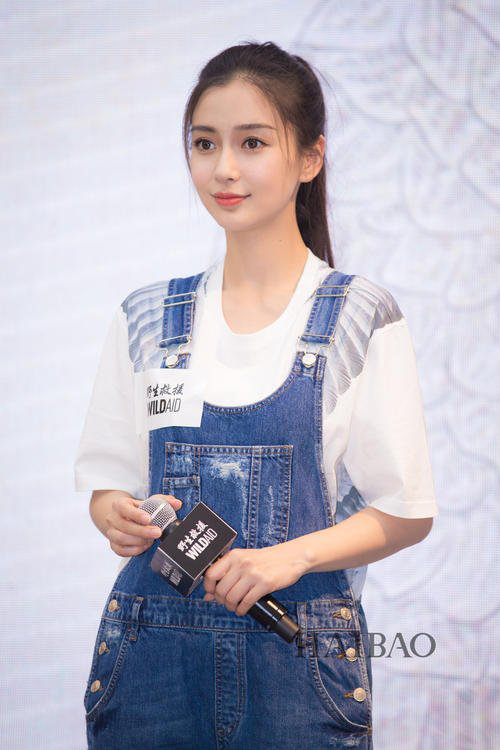

In [88]:
from PIL import Image
#! ls idol2_face
Image.open('idol2/1041709902,3749565719.jpg')

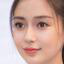

In [87]:
from PIL import Image
#! ls idol2_face
Image.open('idol2_face/1041709902,3749565719.jpg')

In [89]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten,Dropout
# Initialising the CNN
classifier = Sequential()

# Convolution
classifier.add(Conv2D(filters=32, 
           kernel_size=(3, 3),  padding = 'same',
           input_shape = (64, 64, 3),
           activation = 'relu'))

# Max Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Convolution
classifier.add(Conv2D(filters=32, 
          kernel_size=(3, 3), 
          padding = 'same', 
          activation = 'relu'))

# Max Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Flattening
classifier.add(Flatten())

# Fully Connected
classifier.add(Dense(units = 128, activation = 'relu')) 
classifier.add(Dropout(rate=0.1)) 
classifier.add(Dense(units = 128, activation = 'relu')) 
classifier.add(Dropout(rate=0.1)) 
classifier.add(Dense(units = 3, activation = 'softmax'))

In [90]:
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               1048704   
_________________________________________________________________
dropout (Dropout)            (None, 128)              

In [91]:
classifier.compile(optimizer = 'adam', 
          loss ='categorical_crossentropy', 
          metrics = ['accuracy'])

In [92]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
           rescale = 1./255,
           shear_range = 0.2,     #x坐标保持不变，而对应的y坐标按比例发生平移
           zoom_range = 0.2,      #可以让图片在长或宽的方向进行放大
           horizontal_flip = True #水平翻转操作
         )

In [93]:
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255)

In [94]:

import os
if not os.path.exists('train/'):
    os.mkdir('train/')
if not os.path.exists('test/'):
    os.mkdir('test/')

In [95]:
import os
from sklearn.model_selection import train_test_split

def splitDataset(dirs):
    dataset = list(os.listdir(dirs))
    train_data, test_data = train_test_split(dataset, test_size= 0.33, random_state = 42)
    
    if not os.path.exists('train/'+dirs):
        os.mkdir('train/'+dirs)
    if not os.path.exists('test/'+dirs):
        os.mkdir('test/'+dirs)

    for f in train_data:
        os.rename(dirs + f, 'train/'+ dirs + f)
    for f in test_data:
        os.rename(dirs + f, 'test/' + dirs +f)

In [96]:
splitDataset('idol1_face/')

In [97]:
splitDataset('idol2_face/')

In [98]:
splitDataset('idol3_face/')

In [99]:
training_set = train_datagen.flow_from_directory(
    'train/', target_size = (64, 64),
     batch_size = 16,
     class_mode = 'categorical')

Found 24 images belonging to 3 classes.


In [100]:
test_set = test_datagen.flow_from_directory(
    'test/', target_size = (64, 64),
    batch_size = 16, 
    class_mode = 'categorical')

Found 13 images belonging to 3 classes.


In [ ]:
history = classifier.fit_generator(training_set,
                  epochs=100,
                  verbose = 1,
                  validation_data = test_set)

## LSTM

In [102]:
import pandas_datareader
dataset = pandas_datareader.get_data_yahoo('2330.TW', start = '2000-01-01')

/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


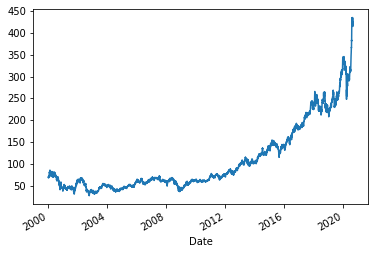

In [103]:
dataset['Close'].plot(kind = 'line')

In [104]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled  = sc.fit_transform(dataset)

In [105]:
X_train = []
y_train = []
for i in range(60,len(training_set_scaled)):
  X_train.append(training_set_scaled[i-60:i,0])
  y_train.append(training_set_scaled[i,0])

In [107]:
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [108]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, LSTM, Dropout

In [109]:
regressor = Sequential()
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True)) 
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True)) 
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

In [ ]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

In [111]:
pred_y = regressor.predict(X_train)

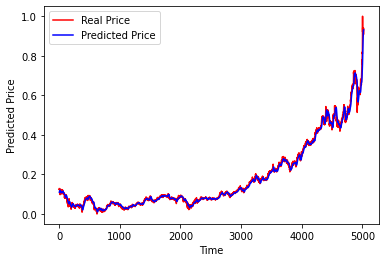

In [112]:
from matplotlib import pyplot as plt
plt.plot(y_train, color = 'red', label = 'Real Price')
plt.plot(pred_y, color = 'blue', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Predicted Price')
plt.legend()
plt.show()

## BERT

In [114]:
! pip install transformers

     |████████████████████████████████| 778kB 3.4MB/s 
     |████████████████████████████████| 890kB 16.2MB/s 
     |████████████████████████████████| 3.0MB 22.1MB/s 
     |████████████████████████████████| 1.1MB 37.7MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp36-none-any.whl size=893260 sha256=1470a16b40fe40423d976e406c166931c651c042c6c9a79b857d6182f7fe6342
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built sacremoses


In [115]:
import tensorflow as tf
import tensorflow_datasets
from transformers import *

# Load dataset, tokenizer, model from pretrained model/vocabulary
tokenizer = BertTokenizer.from_pretrained('bert-base-cased')